In [3]:
import pandas as pd
import zipfile
import pymongo
from pymongo import MongoClient
import chardet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
from flask import Flask, jsonify

In [14]:
#Importing data

jobs_import=pd.read_csv('data job posts.csv',encoding = "utf-8")
resume_import=pd.read_csv('UpdatedResumeDataSet - Copy.csv',engine="python", encoding="utf-8")
# #Why won't you give me the correct formatting????
# path = 'UpdatedResumeDataSet - Copy.csv'
# with open(path, mode='rb') as f:
#     binary = f.read()
#     code = chardet.detect(binary)['encoding']
#     print(code)
resume_import

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [24]:
jobs_import.groupby("Company").size().sort_values(ascending=False)

Company
ArmenTel CJSC                                  353
World Vision Armenia                           239
Mentor Graphics Development Services CJSC      236
Career Center NGO                              229
Orange Armenia                                 203
                                              ... 
Parking City Service CJSC                        1
Parma                                            1
Crossroad Networks                               1
Parma Ltd                                        1
lAssociation Armnienne dAide Sociale (AAAS)      1
Length: 4554, dtype: int64

In [5]:
resume_import_clean=resume_import.replace('[^a-zA-Z\d\_.]+',' ',regex=True)
jobs_import_clean=jobs_import.replace('[^a-zA-Z\d\_.]+',' ',regex=True)

In [7]:
post=jobs_import_clean['jobpost']
cv = CountVectorizer()
count_matrix = cv.fit_transform(post)
cosine_sim = cosine_similarity(count_matrix)
cosine_sim.iloc[:,0].hist();


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [9]:
resume_desc=resume_import_clean['Resume']
count_matrix_resume = cv.fit_transform(resume_desc)
cosine_sim_resume = cosine_similarity(count_matrix_resume)
cosine_sim_resume

array([[1.        , 0.35148895, 0.42726767, ..., 0.47106265, 0.1358234 ,
        0.11093612],
       [0.35148895, 1.        , 0.65307819, ..., 0.23419399, 0.27561647,
        0.19639562],
       [0.42726767, 0.65307819, 1.        , ..., 0.31391493, 0.29288959,
        0.25253695],
       ...,
       [0.47106265, 0.23419399, 0.31391493, ..., 1.        , 0.18818406,
        0.24671316],
       [0.1358234 , 0.27561647, 0.29288959, ..., 0.18818406, 1.        ,
        0.26152068],
       [0.11093612, 0.19639562, 0.25253695, ..., 0.24671316, 0.26152068,
        1.        ]])

In [10]:
job_resume_stack=pd.concat([resume_desc,post],ignore_index=True)
job_resume_stackdf=pd.DataFrame(job_resume_stack)
job_resume_stackdf

,0
0,Skills Programming Languages Python pandas num...
1,Education Details May 2013 to May 2017 B.E UIT...
2,Areas of Interest Deep Learning Control System...
3,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Education Details MCA YMCAUST Faridabad Haryan...
...,...
19958,Technolinguistics NGO TITLE Senior Creative UX...
19959,Coca Cola Hellenic Bottling Company Armenia C...
19960,Coca Cola Hellenic Bottling Company Armenia C...
19961,San Lazzaro LLC TITLE Head of Online Sales Dep...


In [11]:
job_resume_stack_info=job_resume_stackdf.iloc[:,0]
count_matrix_stack = cv.fit_transform(job_resume_stack_info)
cosine_sim_stack = cosine_similarity(count_matrix_stack)

KeyboardInterrupt: 

In [12]:
cosine_sim_stackdf=pd.DataFrame(cosine_sim_stack)
cosine_sim_stackdf.iloc[:10,:10].hist(bins=50)


NameError: name 'cosine_sim_stack' is not defined

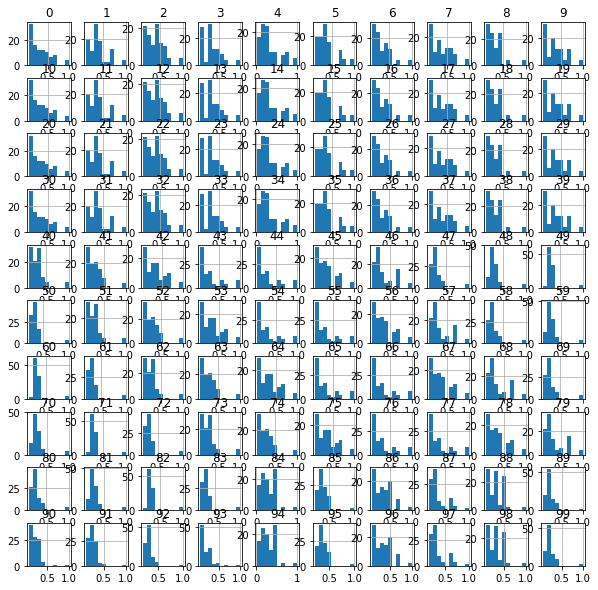

In [55]:
cosine_simdf=pd.DataFrame(cosine_sim)
import seaborn as sns
d=cosine_simdf.iloc[:100,:100]
d.hist(figsize=(10,10));

In [5]:
A=jobs_import_clean.to_dict('records')
B=resume_import_clean.to_dict('records')
B[0]

{'Category': 'Data Science',
 'Resume': 'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery. Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets. Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3.js DC.js Plotly kibana matplotlib ggplot Tableau. Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning.Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology 

In [6]:
#Combine data into mongodb
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)

In [7]:
#set up tables in db
db = client.job_resume
resume = db.resume
job=db.job

In [8]:
#insert data to tables
job.insert_many(A)
resume.insert_many(B)

In [9]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'job_resume')